<a href="https://colab.research.google.com/github/manavshah123/Data-Science-and-machine-learning/blob/main/ALL_REGERSSION_DSML_prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
2
1
[92237.78934589]


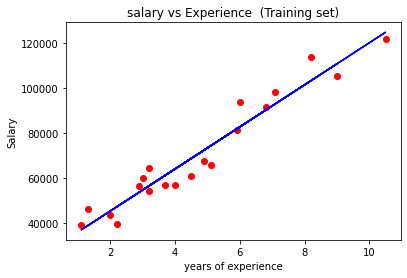

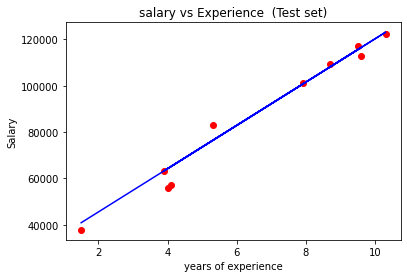

[92237.78934589]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/dataset3.csv')

#just for check

dataset.shape
dataset.info()

#-------------------
#split data set

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values

print(x.ndim)
print(y.ndim)

#-----------------------
#split for training the model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

# y = mx + c - simple linear regreesiom
# y = m1x1 + m2x2 + m3x3 + ...+mnxn + c - multi linear regression
# salary = m * Yearsofexperience + c - we have to implement this 

#regression start here 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#prediction the test result

y_pred = regressor.predict(x_test)
y_pred = regressor.predict([[7]])
print(y_pred)

#ploting

plt.scatter(x_train,y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('salary vs Experience  (Training set)' )
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

#visulizing the Test set results

plt.scatter(x_test,y_test, color='red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.title('salary vs Experience  (Test set)' )
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

import pickle

#save the trained model as a pickle string
#saved_model = pickle.dumps(regressor,'xyz.pkl')
#pickle.loads(saved_model)

from sklearn.externals import  joblib

joblib.dump(regressor,'filename.pkl')
regressor_from_joblib = joblib.load('filename.pkl')

y_pred1 = regressor.predict([[7]])
print(y_pred1)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/dataset4.csv')

#just for check

dataset.shape
dataset.info()

#-------------------
#split data set

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,4].values

print(x.ndim)
print(y.ndim)

#-----------------------
#split for training the model

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import  ColumnTransformer

transform = ColumnTransformer([("State data",OneHotEncoder(),[3])], remainder= 'passthrough')
x = transform.fit_transform(x)

x=x[:, 1:]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# y = mx + c - simple linear regreesiom
# y = m1x1 + m2x2 + m3x3 + ...+mnxn + c - multi linear regression
# salary = m * Yearsofexperience + c - we have to implement this 

#regression start here 

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

#prediction the test result

y_pred = regressor.predict(x_test)
print(y_pred)

import pickle

#save the trained model as a pickle string
#saved_model = pickle.dumps(regressor,'xyz.pkl')
#pickle.loads(saved_model)

from sklearn.externals import  joblib

joblib.dump(regressor,'filename.pkl')
regressor_from_joblib = joblib.load('filename.pkl')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
2
1
[103015.20159796 132582.27760816 132447.73845175  71976.09851259
 178537.48221054 116161.24230163  67851.69209676  98791.73374688
 113969.43533012 167921.0656955 ]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


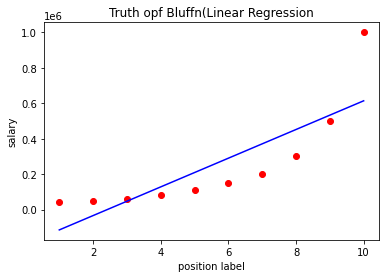

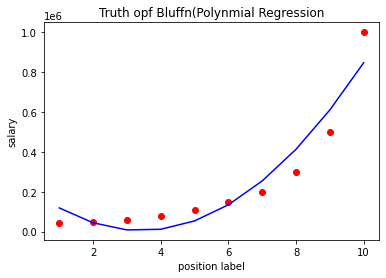

In [16]:
#polynomial and linear on same dataset regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/dataset5.csv')

#just for check

dataset.shape
dataset.info()

#-------------------
#split data set

x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:,-1].values


#regression start here 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

#polynomial

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

#graph of simple linear reg

plt.scatter(x , y, color = 'red')
plt.plot(x, lin_reg.predict(x),color= 'blue')
plt.title('Truth opf Bluffn(Linear Regression')
plt.xlabel('position label')
plt.ylabel('salary')
plt.show()

plt.scatter(x , y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)),color= 'blue')
plt.title('Truth opf Bluffn(Polynmial Regression')
plt.xlabel('position label')
plt.ylabel('salary')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


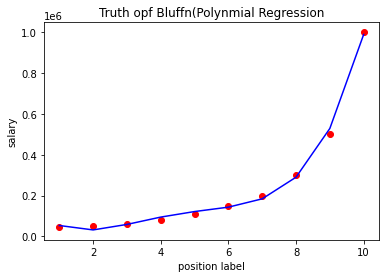

In [15]:
#polynomial regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/dataset5.csv')

#just for check

dataset.shape
dataset.info()

#-------------------
#split data set

x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:,-1].values

#polynomial

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

plt.scatter(x , y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)),color= 'blue')
plt.title('Truth opf Bluffn(Polynmial Regression')
plt.xlabel('position label')
plt.ylabel('salary')
plt.show()